<h1>Case Study 1 - HR</h1>
BY: MHD.SHADI HASAN

<h2>Problem Background</h2>

The HR department of company X has captured all the salary data of its employees from years 2011-2014. Assume we are now in the year 2015 and the organization is facing a financial crisis. As a first step, the HR department wants to analyze employee costs to save payroll budget. 

**Requirments**

It is required to answer the following questions by analyzing the provided data.

    1. How much the total salary has increased from year 2011 to 2014?
    2. Which job title had the highest mean salary in the years 2011 through 2014?
    3. How much money could have been saved in the year 2014 by stopping overtime pay?
    4. Who were the top earning employees across all the years?
    5. Which were the least 5 common job in 2014, and how much did they cost?
    6. What percentage did overtime pay constitute of the total pay?
    
**Data**

|Attribute|Values|
|--|--|
|Id|Special ID for each employee|
|EmployeeName|Name of the employee as 'object'|
|JobTitle| The position held by the employee|
|BasePay|Continuous|
|OvertimePay|Continuous|
|OtherPay|Continuous|
|Benefits|Continuous|
|TotalPay|Continuous|
|TotalPayBenefits|Continuous|
|Year|The year in which the ammounts have been payed|
|Notes|Object|
|Agency|Object|
|Status|Object|

<h2>Data Preparation</h2>

In [1]:
#import the needed libraries for the analysis
import pandas as pd
import numpy as np

In [2]:
#read the data in CSV file to pandas dataframe
df_main = pd.read_csv('Salaries.csv')
df_main.head()

C:\Users\GTS\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


<h2>Data Analysis</h2>

<h3>1- How much the total salary has increased from year 2011 to 2014?</h3>

To Answer this question, a total summation of salaries will be calculated for each year, then the results will be plotted to compare and track the increase in total salaries over the years 2011 to 2014. The increase is equal to the difference in total salaries ammount between 2014 and 2011; that is the total salaries payed in 2014 after subtracting the total salaries payed in 2011.

In [3]:
#create a dataframe of two columns: the year, and the total ammount payed in that year 
TotalByYear = df_main.groupby(by=["Year"], as_index=False)["TotalPayBenefits"].sum()
TotalByYear

,Year,TotalPayBenefits
0,2011,2.594113e+09
1,2012,3.696790e+09
2,2013,3.814772e+09
3,2014,3.821866e+09


In [4]:
#import the libraries needed to plot the above dataframe and see the increase in total salaries 
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

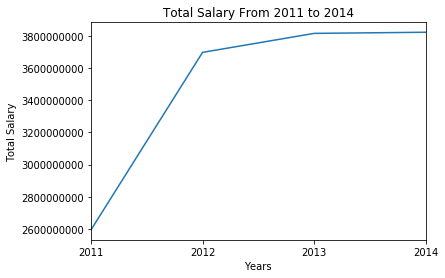

In [5]:
#plot the dataframe
TotalByYear.plot(x='Year', y='TotalPayBenefits')

plt.title('Total Salary From 2011 to 2014')
plt.ylabel('Total Salary')
plt.xlabel('Years')
plt.xticks([2011, 2012, 2013, 2014])
plt.ticklabel_format(style='plain')
plt.legend().set_visible(False)

plt.show()

In [6]:
#to calculate the increase in total salaries from 2011 to 2014
TotalSalary2014 = TotalByYear.at[3,'TotalPayBenefits']
TotalSalary2011 = TotalByYear.at[0,'TotalPayBenefits']
Total_Salary_Increase = TotalSalary2014 - TotalSalary2011

print('Total Salary Payed in 2014 = ',TotalSalary2014) #sum of salaries in 2014
print('Total Salary Payed in 2011 = ',TotalSalary2011) #sum of total salaries in 2011
print('Total Salary Increase = ',Total_Salary_Increase) #difference between 2014 and 2011; the total increase  

Total Salary Payed in 2014 =  3821865780.5999904
Total Salary Payed in 2011 =  2594113030.720046
Total Salary Increase =  1227752749.8799443


<h3>2- Which job title had the highest mean salary in the years 2011 through 2014?</h3>

Here we group the Salaries by job titles and then calculate the mean for each. Afterwards, job titles are to be sorted according to mean salaries in a descending order. The job title with the highest mean salary will be on top.

In [7]:
#group the salaries dataframe by each job title and calculate the mean for that job title
SalaryMean = df_main.groupby(by=["JobTitle"], as_index=False)["TotalPayBenefits"].mean()
SalaryMean.head()

,JobTitle,TotalPayBenefits
0,ACCOUNT CLERK,44035.664337
1,ACCOUNTANT,47429.268000
2,ACCOUNTANT INTERN,29031.742917
3,"ACPO,JuvP, Juv Prob (SFERS)",80266.370000
4,ACUPUNCTURIST,67594.400000


In [8]:
#sort the above table by the mean salary for each job title 
SalaryMean.sort_values(by=['TotalPayBenefits'], inplace=True, ascending=False)
SalaryMean = SalaryMean.reset_index(drop=True)
SalaryMean.head()

,JobTitle,TotalPayBenefits
0,Chief Investment Officer,436224.360000
1,Chief of Police,411732.266667
2,"Chief, Fire Department",408865.326667
3,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
4,"Gen Mgr, Public Trnsp Dept",380696.440000


In [9]:
#the first item -job title- has the highest mean salary
HighestSalary = SalaryMean.at[0,'JobTitle']
print('The job title with the highest mean salary in the years 2011 through 2014 is: ', HighestSalary)

The job title with the highest mean salary in the years 2011 through 2014 is:  Chief Investment Officer


<h3>3- How much money could have been saved in the year 2014 by stopping overtime pay?</h3>

As in question 1, a total summation of salaries for each year will be created. However, another summation of Overtime Pay will also be added in a separate column to be later on subtracted from the total salaries and therefore calculate the ammount that would have been payed in each year if overtime pay was stopped.

Furthermore, the ammount of money that could have been saved in 2014 due to stopping overtime pay, is equal to the summation of overtime pay to all employees in that year.

In [10]:
#create a dataframe with 4 columns: Year,TotalSalaries,TotalOvertime,difference between TotalSalaries and TotalOvertime
Total_OT_ByYear = df_main.groupby(by=["Year"], as_index=False)["TotalPayBenefits","OvertimePay"].sum()
Total_OT_ByYear['TotalMinusOT'] = Total_OT_ByYear['TotalPayBenefits'] - Total_OT_ByYear['OvertimePay']
Total_OT_ByYear

,Year,TotalPayBenefits,OvertimePay,TotalMinusOT
0,2011,2.594113e+09,1.638191e+08,2.430294e+09
1,2012,3.696790e+09,1.846650e+08,3.512125e+09
2,2013,3.814772e+09,1.986214e+08,3.616151e+09
3,2014,3.821866e+09,2.059186e+08,3.615947e+09


In [11]:
#calculate total overtime in 2014, to see how much could have been saved in that year by stopping overtime 
OT_2014 = Total_OT_ByYear.at[3,'OvertimePay']
print(OT_2014, 'could have been saved in the year 2014 by stopping overtime pay')

205918599.27000067 could have been saved in the year 2014 by stopping overtime pay


<h3>4- Who were the top earning employees across all the years?</h3>

To see who the top earning employees were, we group our dataframe by employee and add all their earnings across the years for comparison. After that, the names are sorted in a descending order and take the top five records to plot them and compare. 

However, the names in the dataframe are not unified. Therefore, we begin by unfying names to facilitate the analysis.

In [12]:
#unify the way names are written in the dataframe by capitalizing each word and removing spaces
df_main['EmployeeName'] = df_main['EmployeeName'].str.title()
df_main['EmployeeName'] = df_main['EmployeeName'].str.replace(' ', '')

In [13]:
#group the data by each employee and sum their earnings
TotalEmployeeEarning = df_main.groupby(by=["EmployeeName"], as_index=False)["TotalPayBenefits"].sum()
TotalEmployeeEarning.head()

,EmployeeName,TotalPayBenefits
0,A.JamesRobertsonIi,64787.42
1,A.K.Finizio,13901.57
2,ABernardFatooh,103087.03
3,AElizabethMarchasin,26282.86
4,AJamilNiazi,87496.21


In [14]:
#sort employees by their earnings and show the top 5
TotalEmployeeEarning.sort_values(by=['TotalPayBenefits'], inplace=True, ascending=False)
TotalEmployeeEarning = TotalEmployeeEarning.reset_index(drop=True)
TopEarningEmp = TotalEmployeeEarning.head()

print('The Top Earning Employees Between 2011 and 2014 are: ')
TopEarningEmp

The Top Earning Employees Between 2011 and 2014 are: 


,EmployeeName,TotalPayBenefits
0,KevinLee,3266005.97
1,StevenLee,3113351.96
2,WilliamWong,2713136.27
3,StanleyLee,2520247.63
4,RichardLee,2285723.38


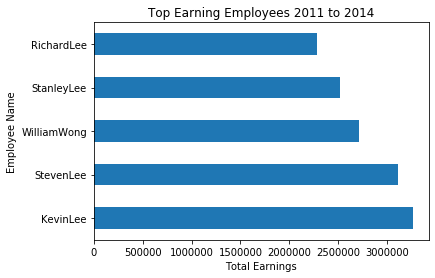

In [15]:
#plot the top 5 earning employees to compare their earnings over the years
TopEarningEmp.plot(kind='barh',x='EmployeeName', y='TotalPayBenefits')

plt.title('Top Earning Employees 2011 to 2014')
plt.xlabel('Total Earnings')
plt.ylabel('Employee Name')
plt.legend().set_visible(False)

plt.show()

<h3>5- Which were the least 5 common job in 2014, and how much did they cost?</h3>

Since 2014 is the year of interest in this question, records of that year are stored in a separate dataframe. The frequency of occurrence for each job title is then calculated to find the least five common jobs. After that, we sum up their salaries to learn how much they cost.

In [16]:
#create a sub-dataframe of 2014 records only
df_2014 = df_main.loc[df_main['Year'] == 2014]
df_2014.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
110529,110532,DavidShinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,NaN,San Francisco,PT
110530,110533,AmyPHart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,FT
110531,110534,WilliamJCoakerJr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,NaN,San Francisco,PT
110532,110535,GregoryPSuhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,2014,NaN,San Francisco,FT
110533,110536,JoanneMHayes-White,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,2014,NaN,San Francisco,FT


In [17]:
#add a column 'frequency' to store the number of employees for each job title
df_2014['frequency'] = df_2014['JobTitle'].map(df_2014['JobTitle'].value_counts())
#sort the data by frequency having the least common jobs on top
df_2014.sort_values(by=['frequency'], inplace=True)
df_2014 = df_2014.reset_index(drop=True)
#store the least 5 common jobs in 'Least_5_common_jobs'
Least_5_common_jobs = df_2014[['JobTitle','TotalPayBenefits']].head()

C:\Users\GTS\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\GTS\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [18]:
#store the least 5 common jobs in a list
JobsList = Least_5_common_jobs['JobTitle'].tolist()
#calculate the total salaries payed for these jobs
JobsCost = Least_5_common_jobs['TotalPayBenefits'].sum()
#show results
print('The least 5 Common Jobs in 2014 were ',JobsList, ' each being held by one employee, ')
print('and cost ', JobsCost, 'in total')

The least 5 Common Jobs in 2014 were  ['Telecommunications Tech Supv', 'Sctry, Juv Probation Comm', 'Materials/Supplies Supervisor', 'Director, Juvenile Hall', 'Shade and Drapery Worker']  each being held by one employee, 
and cost  589165.9400000001 in total


<h3>6- What percentage did overtime pay constitute of the total pay?</h3>

Here we calculate the summation of salaries and that of overtime pay for all employees across the years. Then the required percentage is calculated.

In [19]:
#calculate Total Overtime and Total Pay
OT_Pay = df_main['OvertimePay'].sum()
Tot_Pay = df_main['TotalPay'].sum()
#calculate and show the percentage
print('The percentage of Over Time Pay to Total Pay across the years was','{:.1%}'.format(OT_Pay/Tot_Pay))

The percentage of Over Time Pay to Total Pay across the years was 6.8%
